<a href="https://colab.research.google.com/github/wiinawcyk/344-331/blob/main/6410210353_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import os

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset" #dataset path
for dirname, _, filenames in os.walk(path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/test/Covid/0100.jpeg
/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/test/Covid/094.png
/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/test/Covid/0102.jpeg
/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/test/Covid/0111.jpg
/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/test/Covid/098.jpeg
/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/test/Covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/test/Covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg
/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/test/Covid/0112.jpg
/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/test/Covid/0115.jpeg
/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/test/Covid/COVID-00033.jpg
/content/drive/MyDrive/Cola

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import os
import warnings
warnings.filterwarnings("ignore")

#กำหนดที่อยู่ของโฟลเดอร์ของชุดข้อมูลฝึกและทดสอบ
train_dir = "/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/train" #train dataset path
test_dir = "/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/test"   #test dataset path

#image size = 128*128 , 32 per batch
img_width, img_height = 128, 128
batch_size = 32


train_dataset = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_dataset = ImageDataGenerator(rescale=1./255)

In [10]:
#train test split

X_train = train_dataset.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical"
)

X_test = test_dataset.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical"
)

Found 200 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [ ]:
#create and train  model

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes: Covid, Normal, Viral Pneumonia


model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, epochs=30, validation_data=X_test)

Epoch 1/30
7/7 [==============================] - 79s 10s/step - loss: 1.0253 - accuracy: 0.5400 - val_loss: 1.0394 - val_accuracy: 0.6667
Epoch 2/30
7/7 [==============================] - 15s 2s/step - loss: 0.8009 - accuracy: 0.7100 - val_loss: 0.9809 - val_accuracy: 0.6970
Epoch 3/30
7/7 [==============================] - 15s 2s/step - loss: 0.7033 - accuracy: 0.7150 - val_loss: 0.8161 - val_accuracy: 0.6818
Epoch 4/30
7/7 [==============================] - 15s 2s/step - loss: 0.6335 - accuracy: 0.7200 - val_loss: 0.5854 - val_accuracy: 0.6818
Epoch 5/30
7/7 [==============================] - 17s 2s/step - loss: 0.6408 - accuracy: 0.7250 - val_loss: 0.9238 - val_accuracy: 0.6061
Epoch 6/30
7/7 [==============================] - 14s 2s/step - loss: 0.5127 - accuracy: 0.7800 - val_loss: 0.6197 - val_accuracy: 0.6970
Epoch 7/30
7/7 [==============================] - 15s 2s/step - loss: 0.5332 - accuracy: 0.7650 - val_loss: 0.4775 - val_accuracy: 0.6818
Epoch 8/30
7/7 [=================

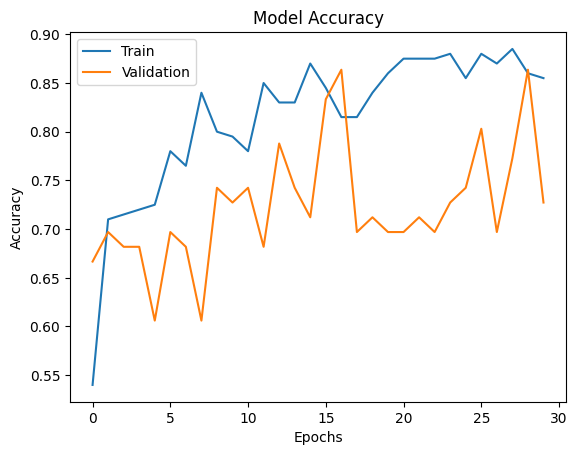

In [ ]:
#evaluate

import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.show()

In [11]:
#create class
#0 = covid
#1 = normal
#2 = viral pneumonia

class_labels = X_train.class_indices
class_names = {value: key for key, value in class_labels.items()}
print("Class Names:", class_names)

Class Names: {0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}


In [12]:
#test with input

from tensorflow.keras.preprocessing import image

img_path = "/content/drive/MyDrive/Colab Notebooks/Data Sci/Covid19-dataset/test/Covid/0108.jpeg" #input path
img = image.load_img(img_path, target_size=(128, 128))
img_arr = image.img_to_array(img)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr / 255.0
pred = model.predict(img_arr)
pred_class = np.argmax(pred)
class_names[pred_class]

1/1 [==============================] - 0s 28ms/step


'Covid'

In [ ]:
#save model to pkl file

import pickle

model_pkl_file = "covid_datection.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)


In [18]:
#input


from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import pickle

input_path = "/content/564000004602602.jpg" #input path

input_image = image.load_img(input_path, target_size=(128, 128))
img_arr = image.img_to_array(input_image)
img_arr = np.expand_dims(img_arr, axis=0)
img_arr = img_arr / 255.0


#output
with open('covid_datection.pkl', 'rb') as file:
    # Load the data from the pickle file
    model = pickle.load(file)

pred = model.predict(img_arr)
pred_class = np.argmax(pred)
class_names[pred_class]


1/1 [==============================] - 0s 90ms/step


'Covid'